In [2]:
import requests
import pandas as pd
import bs4 as bs
from tqdm import tqdm
import numpy as np
from IPython.display import clear_output

In [ ]:
def get_data(year,region=1, zone=37, factor="a_temp", file=""):
    headers = {
        "User-Agent": "Mozilla/5.0",
        "Content-Type": "application/x-www-form-urlencoded",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Accept-Encoding": "gzip, deflate",
        "Cookie": "ASPSESSIONIDSABRDDRS=CPIPEHHDBNGFFFDMHPHCCFJI; ASPSESSIONIDSADRCCRS=LACBBGHDEMOJLHAIDGHNAIFB",
        # you get the point
        }
    data = {
        "regions": f"{region}",
        "zone": f"{zone}",
        "syear": f"{year}",
        "factor": f"{factor}",
        "file": f"{file}",
        }
    url = "http://www.aws-observation.tmd.go.th:80/web/climate/climate_past_inner.asp"
    
    while True:
        try:
            r = requests.post(url, headers=headers, data=data)
            break
        except requests.exceptions.ConnectionError:
            print("Web Kak retrying...")

    # parse the html
    soup = bs.BeautifulSoup(r.text, "html.parser")
    # get the table
    table = soup.findAll("table")
    # to dataframe
    try:
        df = pd.read_html(str(table))[0]
    except ValueError:
        print("------------------------No data-------------------")
        print(r.text)
        return 

    meta_info = {'year': year, 'region': region, 'zone': zone, 'factor': factor}
    return df, meta_info

In [ ]:
all_info = ['a_temp', 'm_temp', 'n_temp', 's_prec', 'a_pres', 'n_pres', 'm_pres', 'a_ws', 'm_ws', 'm_gust', 'a_humi', 'm_humi', 'n_humi', 'a_vis', 'm_vis', 'n_vis', 'a_qff', 'm_qff', 'n_qff']
cols = ['dates']
cols.extend(all_info)
data, metadata = get_data(region=1, zone=37, year=2020, factor="a_temp")

------------------------No data-------------------
<!doctype html><html lang="en"><head><title>HTTP Status 405 – Method Not Allowed</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 405 – Method Not Allowed</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Request method &#39;POST&#39; not supported</p><p><b>Description</b> The method received in the request-line is known by the origin server but not supported by the target resource.</p><hr class="line" /><h3>Apache Tomcat/9.0.64</h3></body></html>


TypeError: ignored

In [ ]:
def get_all_year_data(year,region=1, zone=37):

    def month_encoding(month) -> str:
        encoding = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
        if month not in encoding:
            print("Month not in encoding")
            return None
        return encoding[month]

    def process_data(raw_data) -> pd.DataFrame: # drop na row (like 30/02/2020 that shouldn't exist)
        data = raw_data.dropna(axis=0, how='any')
        if data.shape[0] < 370:
            return data
        else:
            print("Data is not correct")

    data_frame = pd.DataFrame(columns=cols)
    for each_info in tqdm(all_info):
        print(f"Getting {each_info}")
        data, metadata = get_data(year,region=1, zone=37, factor=each_info)
        # flatten d
        dummy = pd.DataFrame(columns=['dates', each_info])
        # loop through all the years(months)
        for month in data.columns:
            if month != 'Date':
                # loop through all the days
                for idx, each_data in enumerate(data[month]):
                    # create_date
                    date_dummy = f"{data['Date'][idx].replace('D', '')}/{month_encoding(month)}/{metadata['year']}"
                    # break at last line (Avg)
                    if data['Date'][idx] == 'Avg':
                        break
                    
                    # append to dummy
                    dummy = dummy.append({'dates': date_dummy, each_info: each_data}, ignore_index=True) # dates, each_info ex. a_temp

        # append to data_frame(show dates)
        data_frame['dates'] = dummy['dates']
        data_frame[each_info] = dummy[each_info]
        # clear
        clear_output(wait=False)

    return process_data(data_frame) # clean dataframe before return

In [ ]:
def get_all(region=1, zone='all'):
    if zone == 'all':
        root = 'http://www.aws-observation.tmd.go.th/web/climate/climate_past.asp'
        while True:
            try:
                r = requests.get(root)
                break
            except requests.exceptions.ConnectionError:
                print("Web Kak retrying get station...")

        soup = bs.BeautifulSoup(r.text, "html.parser")
        name = soup.findAll("select", {"name": "Station"})[0].findAll("option")
        print(name)

In [ ]:
data1 = get_all_year_data(region=1, zone=37, year=2014)

In [ ]:
data2 = get_all_year_data(region=1, zone=37, year=2015)

In [ ]:
data3 = get_all_year_data(region=1, zone=37, year=2016)

In [ ]:
data4 = get_all_year_data(region=1, zone=37, year=2017)

In [ ]:
data5 = get_all_year_data(region=1, zone=37, year=2018)

In [ ]:
data6 = get_all_year_data(region=1, zone=37, year=2019)

In [ ]:
data7 = get_all_year_data(region=1, zone=37, year=2020)

In [ ]:
data8 = get_all_year_data(region=1, zone=37, year=2021)

In [ ]:
data9 = get_all_year_data(region=1, zone=37, year=2022)

In [ ]:
data9

In [ ]:
bigdata = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])

In [ ]:
bigdata.to_csv('data.csv',index = False)

In [3]:
bigdata = pd.read_csv('/content/data (1).csv') 

In [ ]:
bigdata.dates

0       2014-01-01
1       2014-01-02
2       2014-01-03
3       2014-01-04
4       2014-01-05
           ...    
3242    2022-12-16
3243    2022-12-17
3244    2022-12-18
3245    2022-12-19
3246    2022-12-20
Name: dates, Length: 3247, dtype: object

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
bigdata

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff
0,2014-01-01,23.1,29.8,17.5,0.0,1013.2,1010.8,1016.5,3.8,14.0,21.6,68,93,41,6054,12180,2507,1014.8,1018.1,1012.4
1,2014-01-02,23.7,31.7,18.3,0.0,1012.3,1010.6,1014.5,2.8,13.0,16.9,70,96,34,4266,12025,1036,1013.9,1016.0,1012.2
2,2014-01-03,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,16.2,69,96,32,3741,9088,72,1012.9,1015.8,1010.8
3,2014-01-04,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,22.0,71,96,42,4085,8543,548,1012.6,1015.0,1010.8
4,2014-01-05,25.9,32.4,21.5,0.0,1010.2,1008.1,1012.9,3.9,15.1,23.8,68,92,42,7171,13488,473,1011.8,1014.4,1009.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,2022-12-16,25.3,32.3,22.2,0.0,1014.0,1006.0,1011.6,3.5,14.4,22.0,65,90,46,16838,20000,3939,1015.6,1013.1,1007.6
3243,2022-12-17,25.9,32.1,20.5,0.0,1013.9,1007.9,1013.7,3.3,19.1,30.2,67,76,51,16405,20000,10419,1015.5,1015.2,1009.5
3244,2022-12-18,26.9,27.7,19.0,0.0,1014.5,1009.8,1015.6,4.3,19.8,30.2,63,68,46,18705,20000,10567,1016.1,1017.2,1011.4
3245,2022-12-19,26.3,28.6,19.0,0.0,1015.1,1008.6,1015.3,5.7,16.9,23.8,66,81,41,19915,20000,6266,1016.7,1016.9,1010.2


In [ ]:
bigdata[178:180]

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff
178,2014-06-25,29.3,30.5,26.4,0.6,1006.7,1005.0,1009.6,5.9,24.8,34.2,75,96,69,17850,20000,2294,1008.2,1011.1,1006.6
179,2014-06-27,30.2,36.2,26.2,0.0,1007.9,1005.8,1010.9,6.1,17.3,22.3,74,96,48,18933,20000,4792,1009.4,1012.4,1007.4


In [ ]:
# newdates = [i.split('/')[2]+'-'+i.split('/')[1]+'-'+i.split('/')[0] for i in bigdata['dates'] if i.split('/')[0] != "Min"]

In [ ]:
bigdata

In [ ]:
for i,v in enumerate(bigdata['dates']):
  if v.split('/')[0] == "Min":
    bigdata['dates'] = bigdata['dates'].replace(v, np.nan)

In [ ]:
bigdata.dropna(inplace=True)

In [ ]:
bigdata['dates']= pd.to_datetime(bigdata['dates'])

In [ ]:
bigdata['dates'] = bigdata['dates'].astype('string')

In [ ]:
bigdata['dates'] = [i[:10] for i in bigdata['dates']]

In [6]:
import pandas as pd

from datetime import date, timedelta

start_date = date(2014, 1, 1)
end_date = date(2022, 12, 31)
delta = timedelta(days=1)

dts = []
while start_date <= end_date:
    dts.append(start_date)
    start_date += delta

dummy_df = pd.DataFrame({'dates': dts})
dummy_df

,dates
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
3282,2022-12-27
3283,2022-12-28
3284,2022-12-29
3285,2022-12-30


In [7]:
dummy_df['dates'] = dummy_df['dates'].astype('string')

In [8]:
dummy_data = dummy_df.merge(bigdata, on='dates', how='left')

In [9]:
dummy_data

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff
0,2014-01-01,23.1,29.8,17.5,0.0,1013.2,1010.8,1016.5,3.8,14.0,21.6,68,93,41,6054,12180,2507,1014.8,1018.1,1012.4
1,2014-01-02,23.7,31.7,18.3,0.0,1012.3,1010.6,1014.5,2.8,13.0,16.9,70,96,34,4266,12025,1036,1013.9,1016.0,1012.2
2,2014-01-03,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,16.2,69,96,32,3741,9088,72,1012.9,1015.8,1010.8
3,2014-01-04,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,22.0,71,96,42,4085,8543,548,1012.6,1015.0,1010.8
4,2014-01-05,25.9,32.4,21.5,0.0,1010.2,1008.1,1012.9,3.9,15.1,23.8,68,92,42,7171,13488,473,1011.8,1014.4,1009.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3283,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3284,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3285,2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dummy_data[175:178]

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff
175,2014-06-25,29.3,30.5,26.4,0.6,1006.7,1005.0,1009.6,5.9,24.8,34.2,75,96,69,17850,20000,2294,1008.2,1011.1,1006.6
176,2014-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2014-06-27,30.2,36.2,26.2,0.0,1007.9,1005.8,1010.9,6.1,17.3,22.3,74,96,48,18933,20000,4792,1009.4,1012.4,1007.4


In [10]:
data = dummy_data.shift(1)

In [11]:
data

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,23.1,29.8,17.5,0.0,1013.2,1010.8,1016.5,3.8,14.0,21.6,68,93,41,6054,12180,2507,1014.8,1018.1,1012.4
2,2014-01-02,23.7,31.7,18.3,0.0,1012.3,1010.6,1014.5,2.8,13.0,16.9,70,96,34,4266,12025,1036,1013.9,1016.0,1012.2
3,2014-01-03,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,16.2,69,96,32,3741,9088,72,1012.9,1015.8,1010.8
4,2014-01-04,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,22.0,71,96,42,4085,8543,548,1012.6,1015.0,1010.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3283,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3284,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3285,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['y'] = dummy_data['s_prec']

In [ ]:
data[176:179]

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,...,a_humi,m_humi,n_humi,a_vis,m_vis,n_vis,a_qff,m_qff,n_qff,y
176,2014-06-25,29.3,30.5,26.4,0.6,1006.7,1005.0,1009.6,5.9,24.8,...,75,96,69,17850,20000,2294,1008.2,1011.1,1006.6,NaN
177,2014-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
178,2014-06-27,30.2,36.2,26.2,0.0,1007.9,1005.8,1010.9,6.1,17.3,...,74,96,48,18933,20000,4792,1009.4,1012.4,1007.4,0.0


In [13]:
data.dropna(inplace=True)

In [14]:
data['s_prec dack1'] = data['s_prec'].shift(1)

In [15]:
data['s_prec dack2'] = data['s_prec'].shift(2)

In [ ]:
data

In [16]:
data['n_pres dack1'] = data['n_pres'].shift(1)

In [17]:
data['n_pres dack2'] = data['n_pres'].shift(2)

In [18]:
data['n_temp dack1'] = data['n_temp'].shift(1)

In [19]:
data['n_temp dack2'] = data['n_temp'].shift(2)

In [20]:
data.dropna(inplace=True)

In [21]:
data

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,...,a_qff,m_qff,n_qff,y,s_prec dack1,s_prec dack2,n_pres dack1,n_pres dack2,n_temp dack1,n_temp dack2
3,2014-01-03,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,...,1012.9,1015.8,1010.8,0.0,0.0,0.0,1010.6,1010.8,18.3,17.5
4,2014-01-04,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,...,1012.6,1015.0,1010.8,0.0,0.0,0.0,1009.2,1010.6,18.4,18.3
5,2014-01-05,25.9,32.4,21.5,0.0,1010.2,1008.1,1012.9,3.9,15.1,...,1011.8,1014.4,1009.7,0.0,0.0,0.0,1009.2,1009.2,20.5,18.4
6,2014-01-06,26.6,33.7,22.2,0.0,1010.3,1008.0,1012.7,2.7,11.2,...,1011.9,1014.2,1009.6,0.0,0.0,0.0,1008.1,1009.2,21.5,20.5
7,2014-01-07,26.7,32.9,22.3,0.0,1010.5,1008.1,1012.5,3.3,15.1,...,1012.1,1014.0,1009.7,0.0,0.0,0.0,1008.0,1008.1,22.2,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,2022-12-15,25.3,30.4,21.3,0.0,1014.4,1007.2,1013.2,4.0,17.3,...,1016.0,1014.7,1008.8,0.0,0.0,0.0,1009.7,1009.8,20.0,20.0
3272,2022-12-16,25.3,32.3,22.2,0.0,1014.0,1006.0,1011.6,3.5,14.4,...,1015.6,1013.1,1007.6,0.0,0.0,0.0,1007.2,1009.7,21.3,20.0
3273,2022-12-17,25.9,32.1,20.5,0.0,1013.9,1007.9,1013.7,3.3,19.1,...,1015.5,1015.2,1009.5,0.0,0.0,0.0,1006.0,1007.2,22.2,21.3
3274,2022-12-18,26.9,27.7,19.0,0.0,1014.5,1009.8,1015.6,4.3,19.8,...,1016.1,1017.2,1011.4,0.0,0.0,0.0,1007.9,1006.0,20.5,22.2


In [ ]:
data.replace('-', np.nan, inplace=True)

In [ ]:
data

,dates,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,...,a_qff,m_qff,n_qff,y,s_prec dack1,s_prec dack2,n_pres dack1,n_pres dack2,n_temp dack1,n_temp dack2
3,2014-01-03,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,...,1012.9,1015.8,1010.8,0.0,0.0,0.0,1010.6,1010.8,18.3,17.5
4,2014-01-04,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,...,1012.6,1015.0,1010.8,0.0,0.0,0.0,1009.2,1010.6,18.4,18.3
5,2014-01-05,25.9,32.4,21.5,0.0,1010.2,1008.1,1012.9,3.9,15.1,...,1011.8,1014.4,1009.7,0.0,0.0,0.0,1009.2,1009.2,20.5,18.4
6,2014-01-06,26.6,33.7,22.2,0.0,1010.3,1008.0,1012.7,2.7,11.2,...,1011.9,1014.2,1009.6,0.0,0.0,0.0,1008.1,1009.2,21.5,20.5
7,2014-01-07,26.7,32.9,22.3,0.0,1010.5,1008.1,1012.5,3.3,15.1,...,1012.1,1014.0,1009.7,0.0,0.0,0.0,1008.0,1008.1,22.2,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,2022-12-15,25.3,30.4,21.3,0.0,1014.4,1007.2,1013.2,4.0,17.3,...,1016.0,1014.7,1008.8,0.0,0.0,0.0,1009.7,1009.8,20.0,20.0
3272,2022-12-16,25.3,32.3,22.2,0.0,1014.0,1006.0,1011.6,3.5,14.4,...,1015.6,1013.1,1007.6,0.0,0.0,0.0,1007.2,1009.7,21.3,20.0
3273,2022-12-17,25.9,32.1,20.5,0.0,1013.9,1007.9,1013.7,3.3,19.1,...,1015.5,1015.2,1009.5,0.0,0.0,0.0,1006.0,1007.2,22.2,21.3
3274,2022-12-18,26.9,27.7,19.0,0.0,1014.5,1009.8,1015.6,4.3,19.8,...,1016.1,1017.2,1011.4,0.0,0.0,0.0,1007.9,1006.0,20.5,22.2


In [ ]:
data['y'].unique()

array(['0.0', '-', '0.4', '2.4', '4.6', '0.2', '4.8', '7.2', '32.6',
       '14.0', '0.8', '7.4', '32.0', '19.0', '85.6', '7.6', '3.8', '1.0',
       '3.2', '5.8', '8.4', '5.0', '2.2', '1.4', '20.0', '6.2', '0.6',
       '8.6', '1.8', '16.8', '119.6', '11.8', '4.0', '2.6', '41.4',
       '37.4', '58.6', '2.0', '40.8', '36.4', '8.2', '46.8', '1.2',
       '40.2', '15.6', '19.4', '63.0', '4.2', '31.8', '8.0', '9.8',
       '58.4', '23.8', '2.8', '31.2', '99.4', '3.6', '28.8', '50.0',
       '6.4', '38.6', '28.0', '12.8', '82.8', '44.0', '101.4', '13.8',
       '11.0', '11.4', '148.4', '42.8', '55.0', '92.8', '16.4', '29.4',
       '10.0', '28.4', '1.6', '35.6', '3.0', '5.4', '23.0', '11.2',
       '32.8', '5.2', '31.6', '6.8', '88.0', '18.8', '45.0', '49.0',
       '15.0', '78.0', '19.8', '20.4', '25.8', '12.4', '31.4', '37.0',
       '20.6', '52.8', '65.0', '25.2', '34.4', '10.8', '10.4', '25.6',
       '30.8', '112.4', '21.2', '23.6', '76.4', '17.2', '30.0', '6.6',
       '91.0', '24.0

In [ ]:
data['s_prec dack1'].unique()

array([0, 1])

In [22]:
data = data.replace('-',0)

In [23]:
data['y'] = data['y'].astype('float').apply(lambda x : 0 if (x == 0) else 1)

In [24]:
data['s_prec dack1'] = data['s_prec dack1'].astype('float').apply(lambda x : 0 if (x == 0) else 1)

In [25]:
data['s_prec dack2'] = data['s_prec dack2'].astype('float').apply(lambda x : 0 if (x == 0) else 1)

In [26]:
data_train = data[:2744]
data_test = data[2745:] 

In [27]:
xt = data_train.drop(['y','dates'],axis=1)
yt = data_train['y']

In [28]:
xs = data_test.drop(['y','dates'],axis=1)
ys = data_test['y']

In [ ]:
xt

,a_temp,m_temp,n_temp,s_prec,a_pres,n_pres,m_pres,a_ws,m_ws,m_gust,...,n_vis,a_qff,m_qff,n_qff,s_prec dack1,s_prec dack2,n_pres dack1,n_pres dack2,n_temp dack1,n_temp dack2
3,24.7,33.8,18.4,0.0,1011.3,1009.2,1014.3,2.4,13.0,16.2,...,72,1012.9,1015.8,1010.8,0,0,1010.6,1010.8,18.3,17.5
4,25.5,32.8,20.5,0.0,1011.0,1009.2,1013.5,2.4,13.3,22.0,...,548,1012.6,1015.0,1010.8,0,0,1009.2,1010.6,18.4,18.3
5,25.9,32.4,21.5,0.0,1010.2,1008.1,1012.9,3.9,15.1,23.8,...,473,1011.8,1014.4,1009.7,0,0,1009.2,1009.2,20.5,18.4
6,26.6,33.7,22.2,0.0,1010.3,1008.0,1012.7,2.7,11.2,16.9,...,606,1011.9,1014.2,1009.6,0,0,1008.1,1009.2,21.5,20.5
7,26.7,32.9,22.3,0.0,1010.5,1008.1,1012.5,3.3,15.1,19.8,...,344,1012.1,1014.0,1009.7,0,0,1008.0,1008.1,22.2,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,25.3,30.4,21.3,0.0,1014.4,1007.2,1013.2,4.0,17.3,21.6,...,7510,1016.0,1014.7,1008.8,0,0,1009.7,1009.8,20.0,20.0
3272,25.3,32.3,22.2,0.0,1014.0,1006.0,1011.6,3.5,14.4,22.0,...,3939,1015.6,1013.1,1007.6,0,0,1007.2,1009.7,21.3,20.0
3273,25.9,32.1,20.5,0.0,1013.9,1007.9,1013.7,3.3,19.1,30.2,...,10419,1015.5,1015.2,1009.5,0,0,1006.0,1007.2,22.2,21.3
3274,26.9,27.7,19.0,0.0,1014.5,1009.8,1015.6,4.3,19.8,30.2,...,10567,1016.1,1017.2,1011.4,0,0,1007.9,1006.0,20.5,22.2


In [ ]:
data.to_csv('data.csv',index = False)

In [ ]:
data_test['y'].value_counts()

0    209
1    155
Name: y, dtype: int64

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
X = df.drop(['y','dates'],axis=1)
y = df["y"]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [ ]:
importances = model.feature_importances_

In [ ]:
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importances[i]}")

Feature Importances:
a_temp: 0.013055985941556105
m_temp: 0.04669209028331761
n_temp: 0.09004740119124409
s_prec: 0.3345127779329376
a_pres: 0.011214538310825967
n_pres: 0.048537450754055265
m_pres: 0.01265496217123936
a_ws: 0.03666723110594677
m_ws: 0.026018771595670193
m_gust: 0.03237502945300111
a_humi: 0.03633940366602234
m_humi: 0.014659951347948386
n_humi: 0.0373068712613571
a_vis: 0.027579302549731514
m_vis: 0.003566126854141658
n_vis: 0.0429386443704394
a_qff: 0.009519429501424842
m_qff: 0.010214202047753383
n_qff: 0.024096878500547522
s_prec dack1: 0.00686106026842347
s_prec dack2: 0.0011409540857984905
n_pres dack1: 0.03320113746869498
n_pres dack2: 0.0317917273237229
n_temp dack1: 0.04864992136097889
n_temp dack2: 0.020358150653221097


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [30]:
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')

In [31]:
ls_y_hat_train = []
ls_y_train = []

In [32]:
logreg_model = logreg.fit(xt,yt)

In [33]:
y_hat_train = logreg_model.predict(xt)

In [34]:
ls_y_hat_train.extend(y_hat_train)

In [35]:
ls_y_train.extend(yt)

In [36]:
report_train = classification_report(ls_y_train  , ls_y_hat_train)

In [37]:
print('training set')
print(report_train)

training set
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2117
           1       0.54      0.90      0.67       627

    accuracy                           0.80      2744
   macro avg       0.75      0.83      0.76      2744
weighted avg       0.86      0.80      0.81      2744



In [38]:
ls_y_hat_test = []
ls_y_test = []

In [39]:
y_hat_test = logreg_model.predict(xs)

In [40]:
ls_y_hat_test.extend(y_hat_test)

In [41]:
ls_y_test.extend(ys)

In [42]:
report_test = classification_report(ls_y_test,ls_y_hat_test)

In [43]:
print('test set')
print(report_test)

test set
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       209
           1       0.57      0.62      0.59       155

    accuracy                           0.64       364
   macro avg       0.63      0.64      0.63       364
weighted avg       0.64      0.64      0.64       364



In [53]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def plot_roc(clf,xt,yt,xs,ys):
  
  from sklearn.metrics import roc_curve, auc, roc_auc_score
  import matplotlib.pyplot as plt

  clf_model = clf.fit(xt,yt)
  y_score_train = clf_model.predict_proba(xt)
  fpr_train, tpr_train, _ = roc_curve(yt,  y_score_train[:,1])
  auc_train = roc_auc_score(yt, y_score_train[:,1])
  plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

  y_score_test = clf_model.predict_proba(xs)
  fpr_test, tpr_test, _ = roc_curve(ys,  y_score_test[:,1])
  auc_test = roc_auc_score(ys, y_score_test[:,1])
  plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.legend(loc=4)
  plt.show()

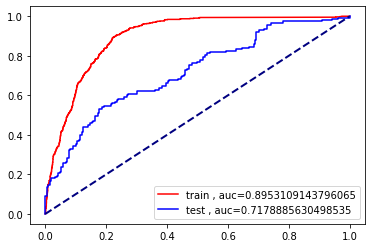

In [ ]:
plot_roc(logreg,xt,yt,xs,ys)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto')
xt,yt = rus.fit_resample(xt,yt)
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
logreg_model = logreg.fit(xt,yt)
y_hat_train = logreg_model.predict(xt)
report_train = classification_report(yt, y_hat_train)
print('Training Set:')
print(report_train)
y_hat_test = logreg_model.predict(xs)
report_test = classification_report(ys, y_hat_test)
print('Test Set:')
print(report_test)

Training Set:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       627
           1       0.78      0.89      0.83       627

    accuracy                           0.82      1254
   macro avg       0.83      0.82      0.82      1254
weighted avg       0.83      0.82      0.82      1254

Test Set:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       209
           1       0.58      0.63      0.60       155

    accuracy                           0.65       364
   macro avg       0.64      0.65      0.64       364
weighted avg       0.65      0.65      0.65       364



In [ ]:
import pickle

In [ ]:
pickle.dump(logreg_model, open('model.joblib', 'wb'))